In [28]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [29]:
a = 0.5 # prey growth rate
b = 0.1 # predator kill rate
c = 0.1 # predator death rate
d = 0.01 # predator growth rate from eating prey

# defining the Lotka-Volterra differential equations
def dSdt(S, t):
    x, y = S
    return [a*x - b*x*y,
            -c*y + d*x*y
           ]

dSdt([1, 1], 5)

[0.4, -0.09000000000000001]

In [ ]:
#Runge-Kutta ODE Solver for 1 prey and 1 predator

def odeSolver(S0, dSdt, time):
    #S0: vector representing all initial populations
    #dSdt : matrix representing the system of ODEs
    #time : number of steps over which we are solving
    
    n = len(S0)

    S = np.zeros((n, time))
    
    for i in range(n):
        S[i, 0] = S0[i]


    t = np.linspace(0, time, time)
    
    for i in range(time-1):
        for j in range(n):
            h = 0.001 #step size
            k1 = dSdt(S[:, i], t)[j]
            k2 = dSdt(S[:, i], t)[j] + (h/2)*k1
            k3 = dSdt(S[:, i], t)[j] + (h/2)*k2
            k4 = dSdt(S[:, i], t)[j] + h*k3
            S[j, i+1] = S[j, i] + (h/6)*(k1+2*k2+2*k3+k4)

    return S, t


2000000
1000000


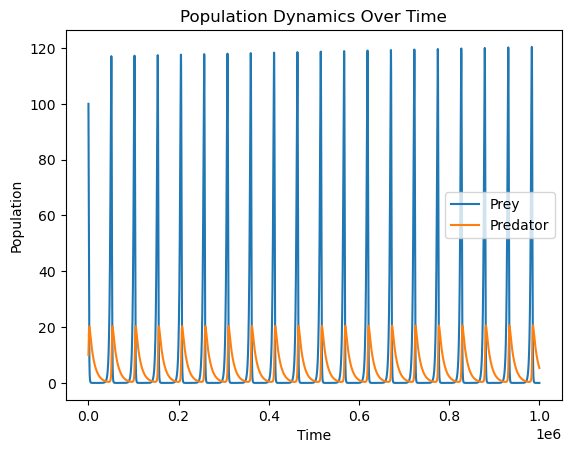

In [31]:
S0 = [100, 10]

S, t = odeSolver(S0, dSdt, 1000000)

print(S.size)
print(t.size)

plt.plot(t, S[0], label = "Prey")
plt.plot(t, S[1], label = "Predator")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Population Dynamics Over Time")
plt.show()